# This code will calculate Entrapment conditions given host and inclusions.
## To run calculate do the following:
    1. Set the host and inclusions.
    2. Specify the mole fractions of hosts and inclusions.
    3. Specify the Inclusion Pressure
    4. To calculate the Entrapment Pressure, specify the Entrapment Temperature.
    5. To calculate the Entrapment Temperature, specify the Entrapment Pressure.
    6. To make a plot, specify the Entrapment Pressure. 

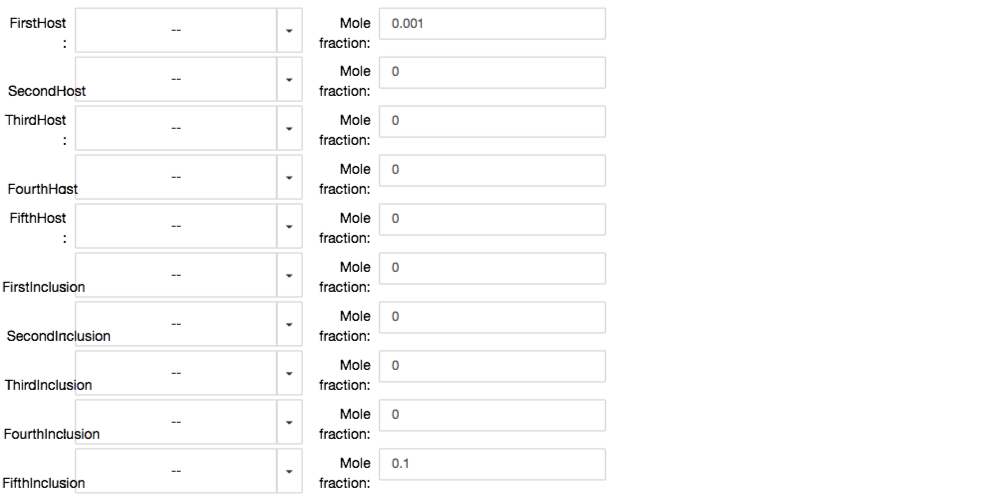

0.1
0.001


In [1]:
from IPython.display import HTML, display
from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select, Button
from bokeh.layouts import layout
from bokeh.models.widgets import TextInput
import ipywidgets as widgets
import inclusion_calc as ic

# output_notebook()

calc = ic.BarInclusion()
all_options = ['--'] + calc.df['End-member'].values.tolist()


mapping = {'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4, 'Fifth': 5}
host_widgets = {}
inclusion_widgets = {}

def on_value_change(change):
    print(change['new'])

for key, value in mapping.items():
    host_name = key + 'Host :'
    host_widgets[value] = {
        'end-member': widgets.Dropdown(
            options=all_options,
            value='--',
            description=host_name,
            disabled=False),
        'mole': widgets.BoundedFloatText(
            value=0.0,
            min=0,
            max=1.0,
            step=0.01,
            description='Mole fraction:',
            disabled=False)
    }
    
    inclusion_name = key + 'Inclusion :'
    inclusion_widgets[value] = {
        'end-member': widgets.Dropdown(
            options=all_options,
            value='--',
            description=inclusion_name,
            disabled=False),
        'mole': widgets.BoundedFloatText(
            value=0.0,
            min=0,
            max=1.0,
            step=0.01,
            description='Mole fraction:',
            disabled=False)
    }
    host_widgets[value]['end-member'].observe(on_value_change, names='value')
    host_widgets[value]['mole'].observe(on_value_change, names='value')
    inclusion_widgets[value]['end-member'].observe(on_value_change, names='value')
    inclusion_widgets[value]['mole'].observe(on_value_change, names='value')



widgets.VBox([widgets.HBox([x['end-member'], x['mole']]) for x in host_widgets.values()] 
             + [widgets.HBox([x['end-member'], x['mole']]) for x in inclusion_widgets.values()] )

In [2]:
# def gather_values(set_of_values):
#     dict_for_calc = {}
#     for row in set_of_values:
#         drpdwn = row[0]._property_values
#         input_val = row[1]
#         print(drpdwn['value'])
#         print(input_val)
#         if (drpdwn['value'] is not None) and (input_val['value'] != "0"):
#             dict_for_calc[drpdwn['value']] = float(input_val['value'])
#     return dict_for_calc
# gather_values(host_set)
# print(host_one._property_values)

In [3]:
# P_incl = TextInput(value="100", title="Inclusion Pressure, MPa")
# P_entrap = TextInput(value="100", title="Entrapment Pressure, MPa")
# T_entrap = TextInput(value="100", title="Entrapment Temperature, MPa")

# g = layout([
#     [P_incl,P_entrap,T_entrap]
# ])
# show(g)

In [4]:
# button_T_entrap = Button(label="Calculate Entrapment Temperature", button_type="success")
# button_P_entrap = Button(label="Calculate Entrapment Pressure", button_type="success")
# button_make_plot = Button(label="Make Plot", button_type="success")

# h = layout([[button_T_entrap, button_P_entrap, button_make_plot]])
# show(h)

In [5]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>